# Analysis:

In [1]:
#inserting the necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

# Data Reading

In [2]:
heart_data <- read_csv("https://raw.githubusercontent.com/RohanBadini/DSCI-Group-43-Project/main/Datasets/heart_failure.csv")
heart_data

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1


# Data Wrangling

In [3]:
#The column names in R should be case sensitive, therefore we have renamed the column names. 
heart_data <- rename(heart_data,
       age = Age, 
       sex = Sex, 
       chestpain_type = ChestPainType,
       resting_bp = RestingBP, 
       cholesterol = Cholesterol, 
       fasting_bs = FastingBS,
       resting_ecg = RestingECG,
       max_hr = MaxHR,
       excercise_angina = ExerciseAngina,
       old_peak = Oldpeak,
       st_slope = ST_Slope,
       heart_disease = HeartDisease)    


We will be predicting the outcome of whether the person has heart disease or not.                                         
In which,**1** means "Yes, the person has heart disease" and **0** means "No, the person don't have heart disease"

Since, we are using 0 and 1 as outcomes. We have converted the values from vector to categorical values.

In [4]:
heart_data <- heart_data |>
mutate(heart_disease = as_factor(heart_disease)) |>
mutate(fasting_bs = as_factor(fasting_bs)) |> 
mutate(sex = as_factor(sex)) 

# Exploratory Data Analysis:

**Splitting the dataset into training dataset and testing dataset**

In [5]:
#Here, we have splited the data into Training dataset and Testing  dataset
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

In [6]:
head(heart_train)
head(heart_test)

age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,excercise_angina,old_peak,st_slope,heart_disease
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
40,M,ATA,140,289,0,Normal,172,N,0,Up,0
37,M,ATA,130,283,0,ST,98,N,0,Up,0
54,M,NAP,150,195,0,Normal,122,N,0,Up,0
39,M,NAP,120,339,0,Normal,170,N,0,Up,0
45,F,ATA,130,237,0,Normal,170,N,0,Up,0
54,M,ATA,110,208,0,Normal,142,N,0,Up,0


age,sex,chestpain_type,resting_bp,cholesterol,fasting_bs,resting_ecg,max_hr,excercise_angina,old_peak,st_slope,heart_disease
<dbl>,<fct>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<fct>
49,F,NAP,160,180,0,Normal,156,N,1,Flat,1
60,M,ASY,100,248,0,Normal,125,N,1,Flat,1
53,M,ASY,124,260,0,ST,112,Y,3,Flat,0
54,M,ASY,125,224,0,Normal,122,N,2,Flat,1
48,F,ATA,120,177,1,ST,148,N,0,Up,0
48,F,ASY,150,227,0,Normal,130,Y,1,Flat,0


In [7]:
#Calculating the sex ratio of the overall data
heart_data_analysis <- heart_train |> 
group_by(sex) |>
summarize(n = n())
heart_data_analysis

sex,n
<fct>,<int>
M,542
F,146


Here, we are creating a model using a training data of 543 males and 145 females. 

In [8]:
heart_data_analysis2 <- heart_train |> 
filter(cholesterol >= 240) |>
group_by(heart_disease)|>
summarize(n = n())
heart_data_analysis2

heart_disease,n
<fct>,<int>
0,128
1,144


As per the article on "www.hopkinsmedicine.org", cholesterol of 240 mg/dL or more is considered to be high cholesterol levels and people with high cholesterol levels are more likely to have heart failure.
https://www.hopkinsmedicine.org/health/treatment-tests-and-therapies/lipid-panel#:~:text=Here%20are%20the%20ranges%20for,or%20above%20240%20mg%2FdL

We can observe that there are 262 individuals with cholesterol levels of 240 mg/dL or higher in the data. 140 individuals suffer from heart failure in that data. So, it's safe to assume that there's around 50% probability that someone with high cholesterol may eventually develop heart failure.

# Comparing Age vs Resting Blood Pressure

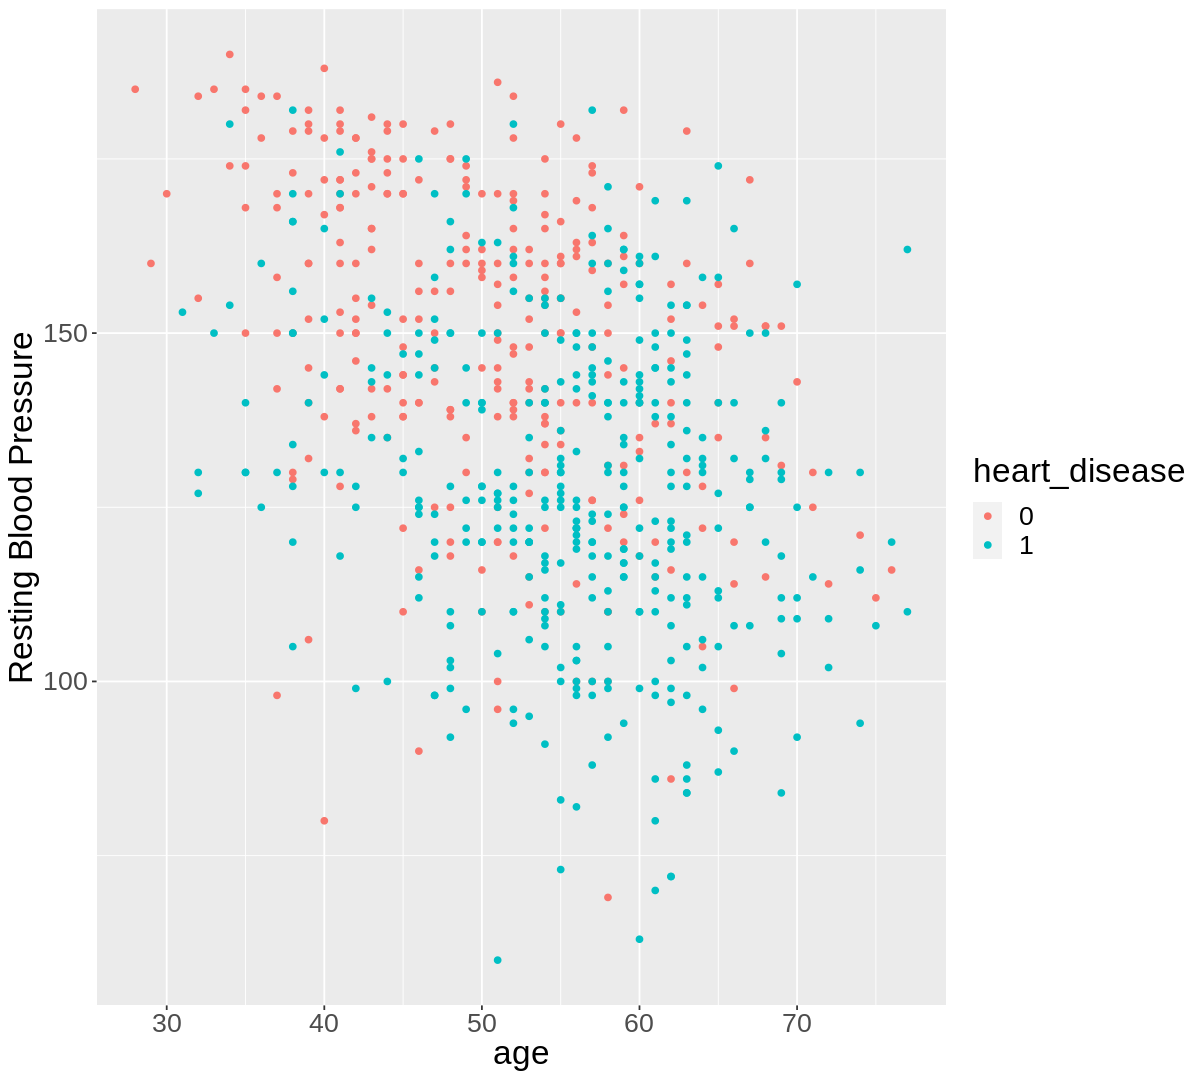

In [9]:
options(repr.plot.width = 10, repr.plot.height = 9)

agevsrestingbp_plot <- heart_train |>
ggplot(aes( x = age , y = max_hr, colour = heart_disease)) + 
    geom_point() + 
 xlab("age") +
    ylab("Resting Blood Pressure") + 
    theme(text = element_text(size=20))

agevsrestingbp_plot